In [4]:
# Inspiration
# Remove the column that only contains missing values
# Do men or women speed more often?
# Does gender affect who gets searched during a stop?
# During a search, how often is the driver frisked?
# Which year had the least number of stops?
# When a man is pulled over, how often is it for speeding?
# How does drug activity change by time of day?
# Do most stops occur at night?

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime,time, date
from dateutil import parser

In [6]:
police = pd.read_csv(r'police_project.csv')
police.sample(10, axis=1).sample(10, axis = 0)

county_name  search_conducted   stop_date  violation  \
82002          NaN             False  2014-11-07   Speeding   
33718          NaN             False  2009-03-31   Speeding   
25782          NaN             False  2008-05-13        NaN   
50068          NaN             False  2011-06-07  Equipment   
5403           NaN             False  2006-04-06   Speeding   
7876           NaN             False  2006-06-30   Speeding   
6973           NaN             False  2006-05-29   Speeding   
90680          NaN             False  2015-11-09  Equipment   
18431          NaN             False  2007-07-07   Speeding   
42520          NaN             False  2010-05-22   Speeding   

       drugs_related_stop stop_time driver_race stop_duration stop_outcome  \
82002               False     07:00       White      0-15 Min     Citation   
33718               False     10:14       White      0-15 Min     Citation   
25782               False     21:18         NaN           NaN          NaN   
50068               False     09:50       White     16-30 Min     Citation   
5403                False     07:12       White      0-15 Min     Citation   
7876                False     10:39       White      0-15 Min     Citation   
6973                False     13:25       White      0-15 Min     Citation   
90680               False     20:22       Black      0-15 Min      Warning   
18431               False     01:30       Other      0-15 Min     Citation   
42520               False     23:43       White     16-30 Min     Citation   

       driver_age_raw  
82002          1983.0  
33718          1984.0  
25782             NaN  
50068          1953.0  
5403           1965.0  
7876           1969.0  
6973           1986.0  
90680          1994.0  
18431          1988.0  
42520          1991.0

#  Checking the nature of the dataset

In [7]:
police.shape

(91741, 15)

In [8]:
police.info(verbose = False)  # check what data type is available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Columns: 15 entries, stop_date to drugs_related_stop
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+ MB


In [9]:
# Total number of registered male and female drivers
police['driver_gender'].value_counts().sum()

86406

# Remove the column that only contains missing values

In [10]:
police.duplicated()== True

0        False
1        False
2        False
3        False
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Length: 91741, dtype: bool

# Do men or women speed more often?

In [11]:
# ratio of male to female
speeding = police['driver_gender'].value_counts().to_frame()
speeding 

driver_gender
M          62895
F          23511

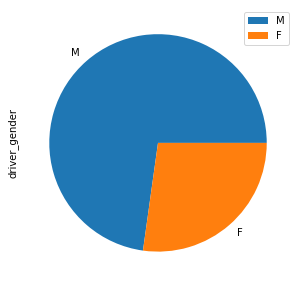

In [12]:
speeding.plot(kind = 'pie', subplots = True, figsize = (7,5));

In [13]:
# % of male to female
round(police['driver_gender'].value_counts(1).to_frame(),3)
# Men speed more than women

driver_gender
M          0.728
F          0.272

In [14]:
# check if there are any null values in driver_gender column ?
police.driver_gender.isnull().value_counts().to_frame()
# so we have 5,335 null values in the drive_gender column 

driver_gender
False          86406
True            5335

# Does gender affect who gets searched during a stop?

In [15]:
police.loc[:, ['driver_gender', 'search_conducted']].groupby('driver_gender')\
.count().rename({'search_conducted' : 'Count_of_search'},axis = 1)

# Yes the male ate searched more than the female

Count_of_search
driver_gender                 
F                        23511
M                        62895

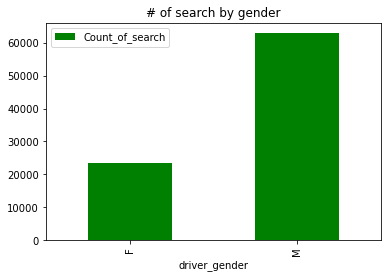

In [16]:
police.loc[:, ['driver_gender', 'search_conducted']].groupby('driver_gender')\
.count().rename({'search_conducted' : 'Count_of_search'},axis = 1)\
.plot(kind ='bar',color = 'green', title ='# of search by gender');

# During a search, how often is the driver frisked?

In [17]:
arrest = round(police.is_arrested.value_counts(100).to_frame(),2)
arrest
# Only 3% of the time , are drivers arrested

is_arrested
False         0.97
True          0.03

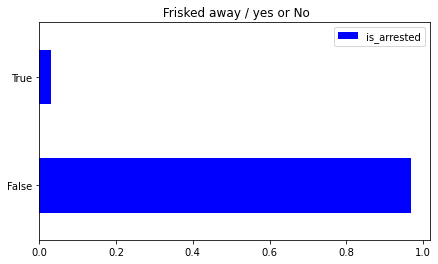

In [18]:
arrest.plot(kind = 'barh',figsize = (7,4), color = 'blue', title =' Frisked away / yes or No');

# Which year had the least number of stops?

In [19]:
pd.DatetimeIndex(police.stop_date).year  # can use   ===  >  pd.DatetimeIndex(['stop_date']).year

Int64Index([2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='stop_date', length=91741)

In [20]:
least_year = police['stop_date'].to_frame()
least_year

stop_date
0      2005-01-02
1      2005-01-18
2      2005-01-23
3      2005-02-20
4      2005-03-14
...           ...
91736  2015-12-31
91737  2015-12-31
91738  2015-12-31
91739  2015-12-31
91740  2015-12-31

[91741 rows x 1 columns]

In [21]:
least_year['year'] = pd.DatetimeIndex(police['stop_date']).year

In [22]:
least_year.groupby('year').count().sort_values('stop_date', ascending = True).head(1)

stop_date
year           
2005       2558

# When a man is pulled over, how often is it for speeding?

In [23]:
police[(police.violation.str.contains('Speeding')) & (police.driver_gender == 'M')]\
.violation.value_counts().to_frame().rename({'violation' :'no of violation by men'}, axis = 1)

no of violation by men
Speeding                   32979

In [24]:
police.loc[:, ['violation','driver_gender']].groupby ('driver_gender').get_group('M').value_counts()

violation            driver_gender
Speeding             M                32979
Moving violation     M                13020
Equipment            M                 8533
Other                M                 3627
Registration/plates  M                 2419
Seat belt            M                 2317
dtype: int64

# How does drug activity change by time of day?

In [25]:
tod_police = police [police['drugs_related_stop'] == True]\
.loc[:, ['stop_time', 'stop_duration' ,'drugs_related_stop']]
tod_police.head()

stop_time stop_duration  drugs_related_stop
40      00:00     16-30 Min                True
41      00:00       30+ Min                True
118     01:20       30+ Min                True
139     00:20     16-30 Min                True
219     23:30     16-30 Min                True

# Do most stops occur at night?

In [26]:
# first we have to group the time ofstops
# 2nd create a column and iterate with the time group
nite = police.loc[:, ['stop_time']]
nite.head()

stop_time
0     01:55
1     08:15
2     23:15
3     17:15
4     10:00

In [27]:
nitex = nite.stop_time = pd.to_datetime(nite.stop_time)

In [28]:
nite2 = nitex.to_frame()
nite2['hour'] = pd.DatetimeIndex(nite2['stop_time']).hour
nite2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   stop_time  91741 non-null  datetime64[ns]
 1   hour       91741 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [29]:
nite2['time_of_day'] = [ 'day' if 6 < i < 18  else 'night' for i in nite2.hour ]

In [30]:
nite2.head()

stop_time  hour time_of_day
0 2022-05-24 01:55:00     1       night
1 2022-05-24 08:15:00     8         day
2 2022-05-24 23:15:00    23       night
3 2022-05-24 17:15:00    17         day
4 2022-05-24 10:00:00    10         day

In [31]:
nite2.set_index('hour').time_of_day
nite2.time_of_day.value_counts()

day      55481
night    36260
Name: time_of_day, dtype: int64

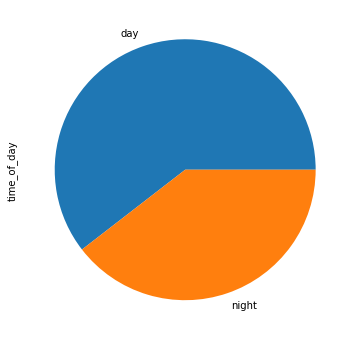

In [32]:
nite2.time_of_day.value_counts().plot(kind = 'pie', figsize = (10,6));

In [33]:
nite2.sort_values('time_of_day', ascending = False).head()

stop_time  hour time_of_day
0     2022-05-24 01:55:00     1       night
47557 2022-05-24 22:21:00    22       night
47511 2022-05-24 23:17:00    23       night
47512 2022-05-24 23:59:00    23       night
47513 2022-05-24 02:36:00     2       night